In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


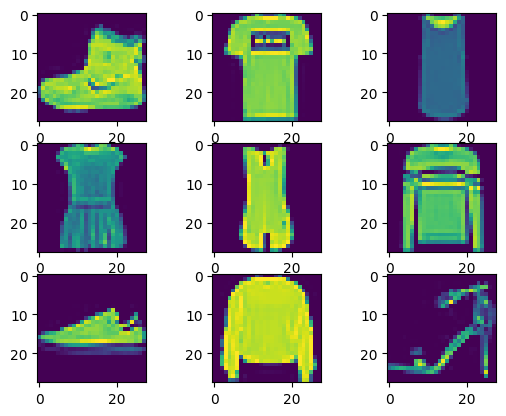

In [5]:
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(x_train[i])
plt.show()

In [6]:
x = x_test
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [7]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=1)

Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.5616 - accuracy: 0.7951 - val_loss: 0.4464 - val_accuracy: 0.8313
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.3989 - accuracy: 0.8528 - val_loss: 0.4009 - val_accuracy: 0.8487
Epoch 3/10
469/469 [==============================] - 15s 31ms/step - loss: 0.3575 - accuracy: 0.8664 - val_loss: 0.4043 - val_accuracy: 0.8537
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.3344 - accuracy: 0.8768 - val_loss: 0.3592 - val_accuracy: 0.8716
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3186 - accuracy: 0.8825 - val_loss: 0.3775 - val_accuracy: 0.8643
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.3044 - accuracy: 0.8867 - val_loss: 0.3419 - val_accuracy: 0.8788
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2950 - accuracy: 0.8912 - val_loss: 0.3416 - val_accuracy:

In [10]:
model.save('Fashion_ANN_W9.h5')

Test loss= 0.3348284065723419
Test accuracy= 0.8885999917984009


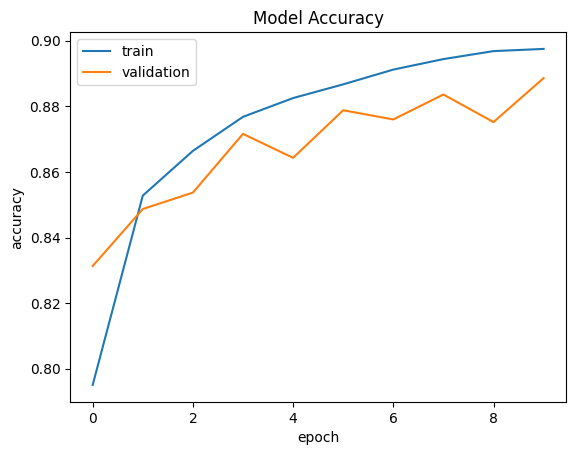

In [11]:
print('Test loss=',score[0])
print('Test accuracy=',score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

313/313 [==============================] - 3s 8ms/step


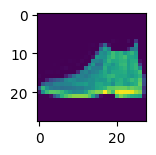

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


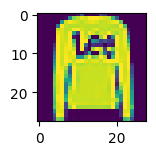

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


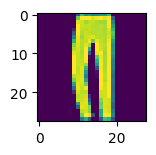

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


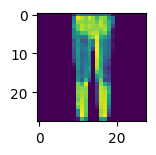

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


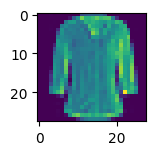

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


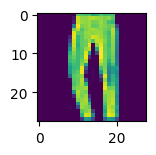

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


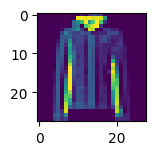

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


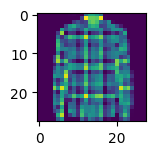

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


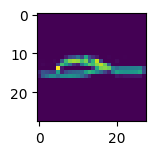

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))